In [ ]:
import pandas as pd
import numpy as np

In [29]:
# 거의 28000000 만개의 행으로 구성되어있다... 이거 분명히 돌리면 Ram이 터진다. 어떻게 할까...?
rating_df = pd.read_csv("/content/drive/MyDrive/project4/ml-latest/ratings.csv")
rating_df

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [ ]:
# timestamp는 사용하지 않을 컬럼이니까 지워버리고 저장! but 용량은 줄어들었지만 행의 개수는 그대로...
rating_df.drop(columns = "timestamp", inplace=True)
rating_df

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
27753439,283228,8542,4.5
27753440,283228,8712,4.5
27753441,283228,34405,4.5
27753442,283228,44761,4.5


In [ ]:
# 그러면 랜덤으로 30000개를 뽑아서 사용을 해보자 .. 10만개로 해봤는데 많이 느려져서 엄청 줄였다.
rating_df = rating_df.sample(n=30000)

In [ ]:
rating_df.info(memory_usage='deep') # 메모리 사이즈를 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 17179423 to 24062829
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   30000 non-null  int64  
 1   movieId  30000 non-null  int64  
 2   rating   30000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 937.5 KB


In [ ]:
rating_df.describe() #이 데이터에서는 최소 평점이 0.5 그리고 최댓값이 5점인 것을 알 수 있다.

,userId,movieId,rating
count,30000.000000,30000.000000,30000.000000
mean,142104.093767,18617.297700,3.537950
std,81514.816919,35161.702362,1.067297
min,1.000000,1.000000,0.500000
25%,71341.750000,1101.000000,3.000000
50%,142424.500000,2723.000000,4.000000
75%,212681.250000,7153.000000,4.000000
max,283228.000000,191739.000000,5.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# movie data를 보게 되면 no genres listed 라는 것과 IMAX 라는 것이 있는데 그것은 데이터를 전처리 하는 과정에서 삭제.
movies_df = pd.read_csv("/content/drive/MyDrive/project4/ml-latest/movies.csv")
index = movies_df[(movies_df["genres"]=="(no genres listed)")|(movies_df["genres"]=="IMAX")].index


In [ ]:
movies_df = movies_df.drop(index)
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58092,193874,Blondie's Big Moment (1947),Comedy
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [ ]:
# 장르를 보게되면 '|' 가 있는데 데이터를 분석하는 과정에서 불필요할 것 같아 지워버렸다.
movies_df["genres"]=movies_df["genres"].str.split("|")
movies_df


,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
58092,193874,Blondie's Big Moment (1947),[Comedy]
58094,193878,Les tribulations d'une caissière (2011),[Comedy]
58095,193880,Her Name Was Mumu (2016),[Drama]
58096,193882,Flora (2017),"[Adventure, Drama, Horror, Sci-Fi]"


In [ ]:
# 각 영화에 대한 사용자의 데이터가 필요! 유저의 평점이 포함되어 있는 rating_df와 movies_df 파일을 movieId 컬럼을 기준으로 inner 방식으로 합친다. (사용자 평가의 수 X 영화의 수) 만큼 늘어난다.
# 여기서 inner 방식이란? 두 데이터셋 간의 중복된 요소만을 Join하는 Inner Join


data = pd.merge(rating_df, movies_df, on = "movieId", how = 'inner')

data.head()

,userId,movieId,rating,title,genres
0,175507,109487,4.5,Interstellar (2014),"[Sci-Fi, IMAX]"
1,57353,109487,4.5,Interstellar (2014),"[Sci-Fi, IMAX]"
2,135973,109487,4.5,Interstellar (2014),"[Sci-Fi, IMAX]"
3,248840,109487,2.0,Interstellar (2014),"[Sci-Fi, IMAX]"
4,190343,109487,3.0,Interstellar (2014),"[Sci-Fi, IMAX]"


 # Pivot Table

In [ ]:
# 0이 나오는 이유는? 한 유저가 모든 영화를 다 봤던 것은 아니기에 0 이 나올 수 있다. 


matrix = data.pivot_table(index = "userId", columns = "title", values = "rating").fillna(0)

matrix.head(20)

title,'Round Midnight (1986),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(T)ERROR (2015),*batteries not included (1987),...And Justice for All (1979),1 (2014),10 (1979),10 Cloverfield Lane (2016),...,Zoolander (2001),Zoolander 2 (2016),Zoom (2015),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Asu Mare! 2 (2015),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



# ID 134596

In [ ]:
# movies_df_origin = pd.read_csv("/content/drive/MyDrive/project4/ml-latest/movies.csv")
# movies_df_origin 

In [ ]:
# movies_df_origin['genres'] = movies_df_origin['genres'].str.split("|")
# movies_df_origin['genres'] 


In [ ]:
# movies_df_origin[movies_df_origin['title']=='Toy Story (1995)']['genres'][0][0]

In [ ]:
# ID 134596 이 평점점을 단 movieId
movie_Id = rating_df[rating_df["userId"]== 134596]["movieId"]
movie_Id 

13170361     7706
13169734     5479
13174243    99258
13174169    97713
13171041    26809
13170151     6912
Name: movieId, dtype: int64

In [ ]:
# 각 영화에 대한 사용자의 데이터가 필요! ID ()이 평점점을 단 정보를 보여주는 movie_Id 데이터 프레임과 movies_df_origin 파일을 합쳐
prefered_genre_df = pd.merge(movie_Id, movies_df, on='movieId')
prefered_genre_df

,movieId,title,genres
0,7706,Animal Crackers (1930),"[Comedy, Musical]"
1,5479,K-19: The Widowmaker (2002),"[Action, Adventure, Drama, Thriller]"
2,99258,Who Wants to Kill Jessie? (Kdo chce zabít Jess...,"[Comedy, Sci-Fi]"
3,97713,"X from Outer Space, The (Uchû daikaijû Girara)...","[Horror, Sci-Fi]"
4,26809,"Baby of Mâcon, The (a.k.a. The Baby of Macon) ...",[Drama]
5,6912,You'll Never Get Rich (1941),"[Comedy, Musical, Romance]"


In [ ]:
# 장르들을 담을 딕셔너리
unique_genre_dict = {}

# 영화의 수만큼 반복된다.
for row in prefered_genre_df["genres"]:
    for genre_name in row: 
        if genre_name in ["IMAX","(no genres listed)"]:
            continue
    	# 현재 장르의 이름으로 저장된 데이터가 없다면
        elif (genre_name in unique_genre_dict) == False:
        	unique_genre_dict[genre_name] = 1
        else:
        	unique_genre_dict[genre_name] = unique_genre_dict[genre_name] + 1
            
            
unique_genre_dict

{'Comedy': 3,
 'Musical': 2,
 'Action': 1,
 'Adventure': 1,
 'Drama': 2,
 'Thriller': 1,
 'Sci-Fi': 2,
 'Horror': 1,
 'Romance': 1}

In [ ]:
total = sum(list(unique_genre_dict.values()))
percent = [round(i*100,4) for i in map(lambda x: x/total, list(unique_genre_dict.values()))]
percent

[21.4286, 14.2857, 7.1429, 7.1429, 14.2857, 7.1429, 14.2857, 7.1429, 7.1429]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


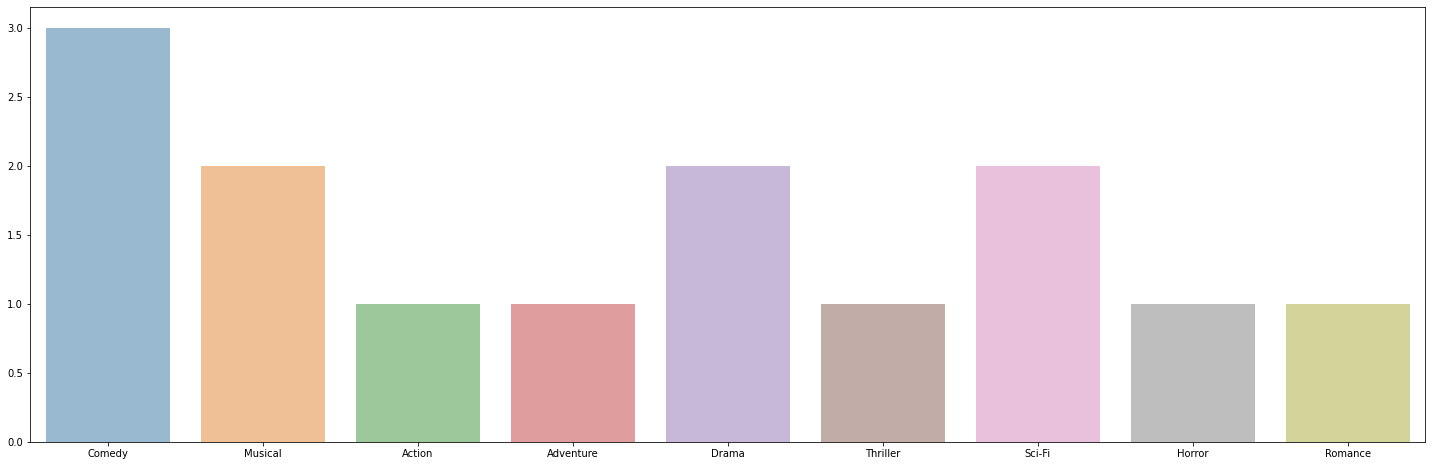

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
x = list(unique_genre_dict.keys())
y = list(unique_genre_dict.values())
sns.barplot(x, y, alpha=0.5)

# ID 134596 
선호하는 장르 Top5: drama, comedy, action , war, adventure 순

In [ ]:
# 평점 분포도
rating = rating_df[rating_df["userId"]== 134596]["rating"].value_counts(ascending = True)
sorted_rating = sorted(rating.index)
rating_distribution_df = pd.DataFrame(rating[sorted_rating])
rating_distribution_df

,rating
1.5,1
3.0,3
3.5,2


# ID 134596
평점: 2.5 / 2개
      3.0 / 5개
      3.5 / 4개
      4.0 / 1개

In [ ]:
# 평점 분포도 그래프 Controlling text fontsize with uniformtext
import plotly.express as px

df = rating_distribution_df
fig = px.pie(df, values= rating[sorted_rating], names = rating[sorted_rating].index, title = "Distribution chart of movie ratings")
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# Pearson Correlation

In [ ]:
# 상관관계 조사하기! 유저가 재밌게 본 영화를 기준으로 비슷한 영화를 추천받고 싶다!! (재밌게 본 영화 = 평점을 매긴 영화중 )

GENRE_WEIGHT = 0.1 
def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

def recommend(input_movie, matrix, n , similar_genre=True): # similar_genre = True 를 하는 이유? input으로 받은 영화와 비슷한 장르의 가중치를 둘 것인지 여부!
    input_genres = movies_df[movies_df['title'] == input_movie]["genres"].iloc[0]

    result = []
    for title in matrix.columns:
        if title == input_movie:
            continue

        # rating comparison
        cor = pearsonR(matrix[input_movie], matrix[title]) # 상관관계가 높을 수록 관련이 높은 것이다.

        # genre comparison
        if similar_genre and len(input_genres) > 0: # 장르의 길이가 0보다 클때 
            comparison_genres = movies_df[movies_df['title'] == title]["genres"].iloc[0] # comparison_genres: 지금 비교하고 있는 영화


            same_count = np.sum(np.isin(input_genres, comparison_genres)) # temp_genres(지금 비교하고 있는 영화의 장르)와 input한 영화 장르의 배열을 비교하여 똑같은 요소가 있으면 True를 반환환
            cor += (GENRE_WEIGHT * same_count) # 같은 장르가 많을 수록 ↑ -> 장르의 가중치를 준다!

        if np.isnan(cor): # 상관관계를 구할 수 없으면 continue
            continue
        else:
            result.append((title, '{:.2f}'.format(cor), comparison_genres))

    result.sort(key = lambda r: r[1], reverse = True) # rating이 높은 순서대로 sorting

    return result[:n]
    


# prediction

In [ ]:
recommend_result = recommend("K-19: The Widowmaker (2002)", matrix,  10 , similar_genre = True)

pd.DataFrame(recommend_result, columns = ["title", "correlation", "genre"])

,title,correlation,genre
0,"Baby of Mâcon, The (a.k.a. The Baby of Macon) ...",0.93,[Drama]
1,Animal Crackers (1930),0.83,"[Comedy, Musical]"
2,Who Wants to Kill Jessie? (Kdo chce zabít Jess...,0.83,"[Comedy, Sci-Fi]"
3,"X from Outer Space, The (Uchû daikaijû Girara)...",0.83,"[Horror, Sci-Fi]"
4,You'll Never Get Rich (1941),0.83,"[Comedy, Musical, Romance]"
5,3:10 to Yuma (1957),0.40,"[Action, Adventure, Drama, Thriller, Western]"
6,Azumi (2003),0.40,"[Action, Adventure, Drama, Thriller]"
7,Blood Diamond (2006),0.40,"[Action, Adventure, Crime, Drama, Thriller, War]"
8,"Bourne Identity, The (1988)",0.40,"[Action, Adventure, Drama, Mystery, Thriller]"
9,"Bourne Legacy, The (2012)",0.40,"[Action, Adventure, Drama, Thriller, IMAX]"


In [ ]:
# prefered_movie = prefered_genre_df["title"]
# for i in prefered_movie:
#     recommend_result = recommend(i, matrix,  5 , similar_genre = True)
#     result =  pd.DataFrame(recommend_result, columns = ["title", "correlation", "genre"])
#     print(result)
#     print('-'*100)

In [ ]:
# pd.DataFrame(movies_df[movies_df['title'] == "Sahara (2005)" ]["genres"])

In [ ]:
 #iloc: 전체 데이터 프레임에서 인덱스 이름이 0인 행만 추출
 #loc:  전체 데이터 프레임에서 0번째 행에 있는 값들만 추출